In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./ingredient.csv")

# Data Exploration

In [4]:
df.head(10)

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
5,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
7,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00
8,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
9,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00


In [5]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [6]:
df.shape

(214, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [8]:
df['a'].value_counts()

1.51645    3
1.51590    3
1.52152    3
1.51811    2
1.51829    2
          ..
1.52664    1
1.51592    1
1.51832    1
1.51852    1
1.51660    1
Name: a, Length: 178, dtype: int64

In [9]:
# Check for null value
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

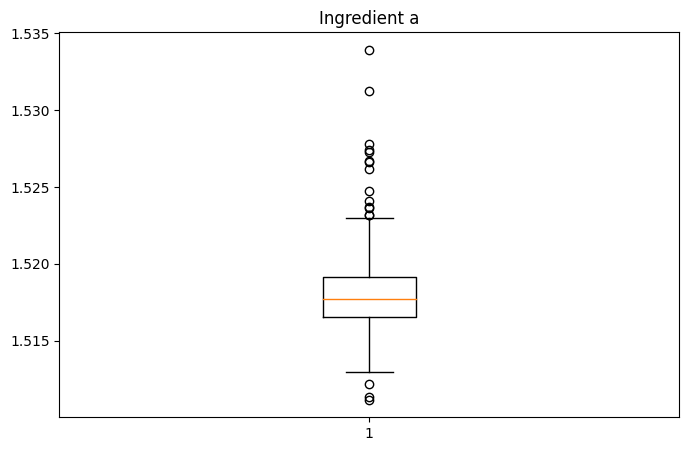

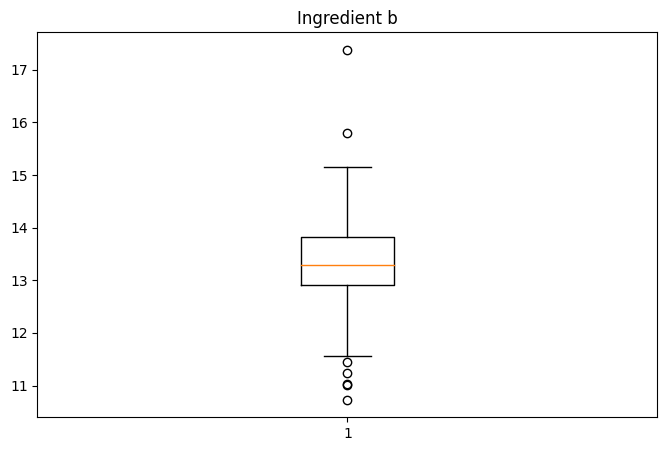

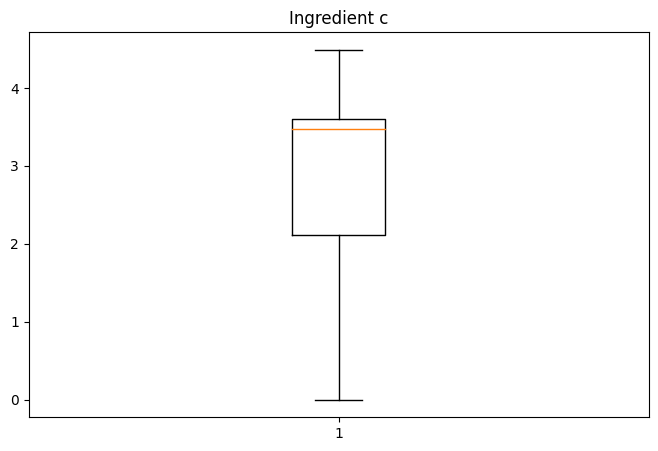

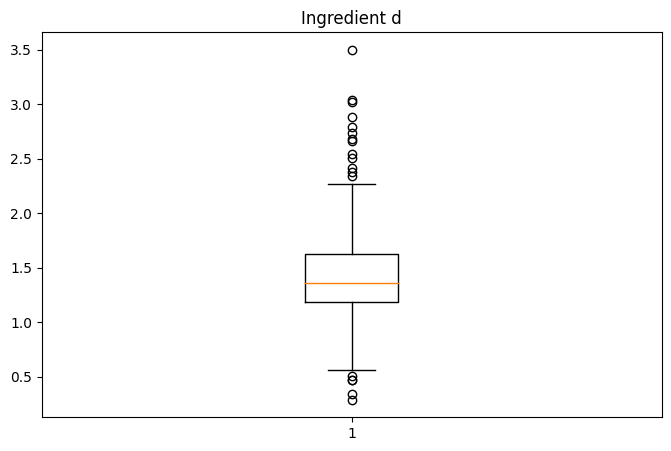

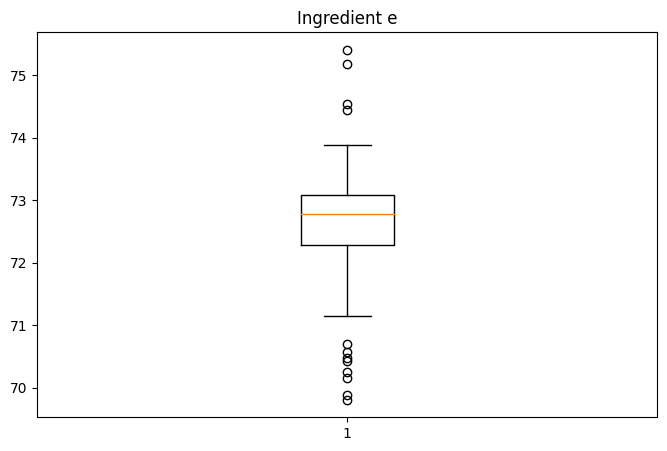

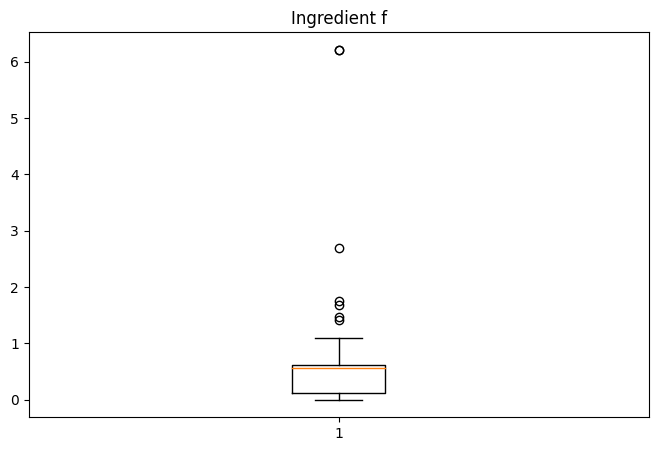

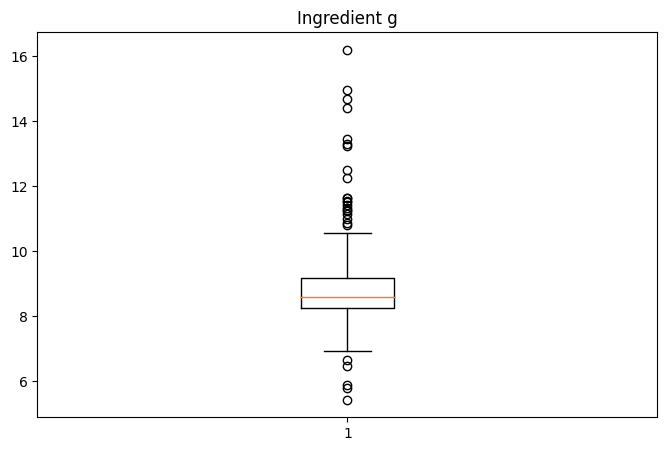

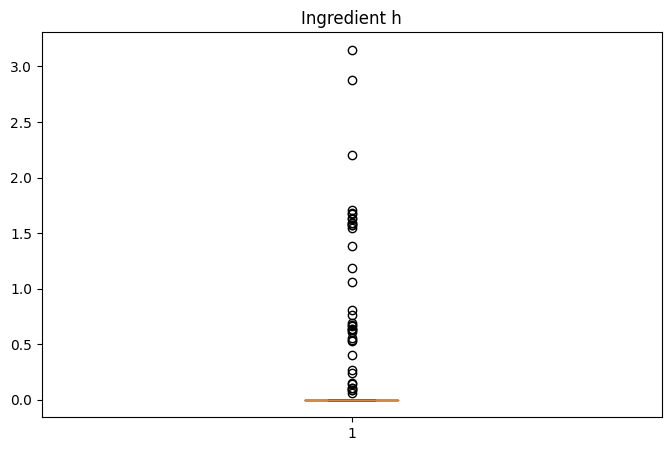

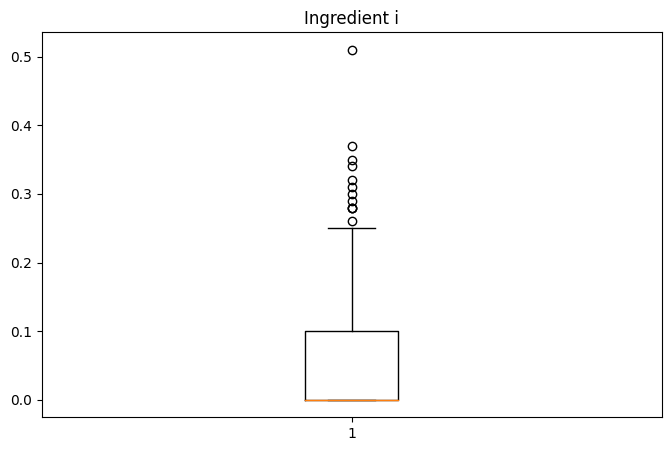

In [27]:
# Check for outliner
for col in df.columns:
    fig = plt.figure(figsize =(8, 5))
    plt.title("Ingredient {}".format(col))
    plt.boxplot(df[col])

# Distribution Study

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'c'}>],
       [<AxesSubplot:title={'center':'d'}>,
        <AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'f'}>],
       [<AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'h'}>,
        <AxesSubplot:title={'center':'i'}>]], dtype=object)

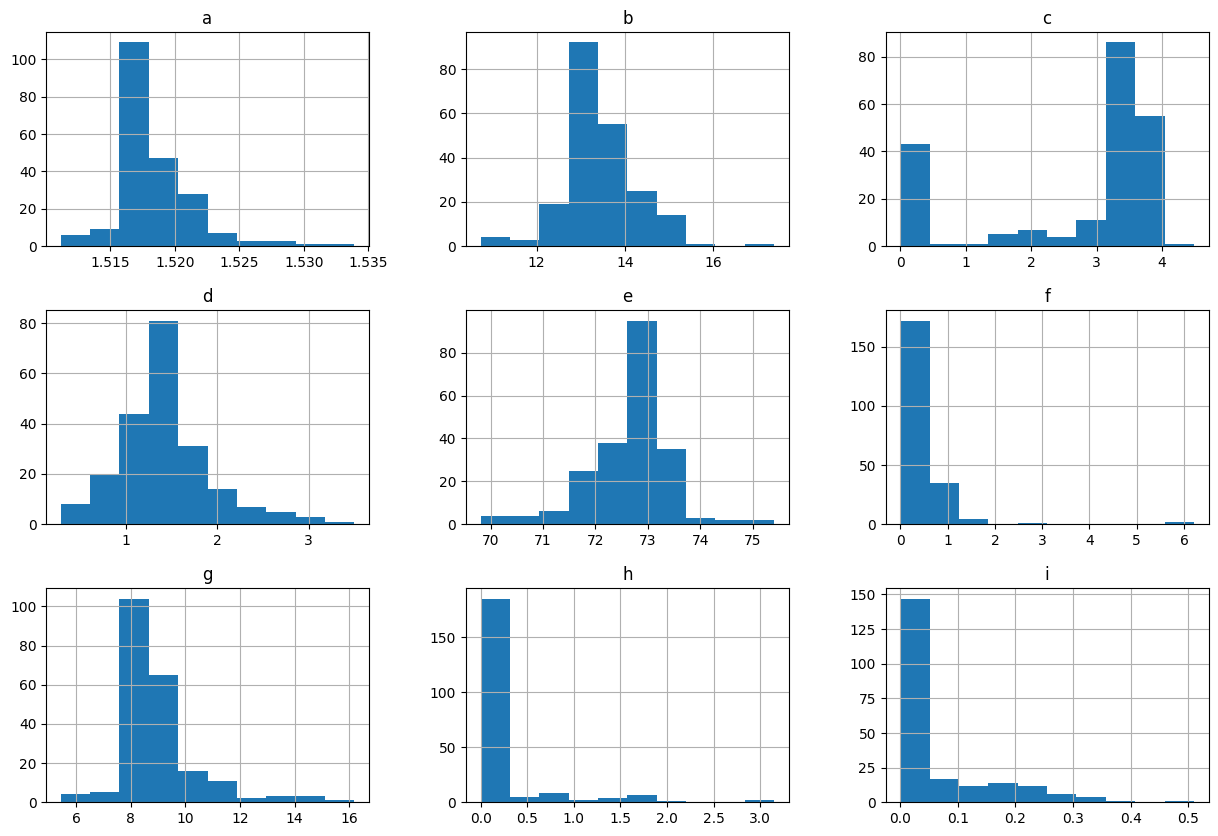

In [11]:
# Data distributions
df.hist(figsize=(15,10))

### Findings:
* Most ingredients have normal distrbution, except for ingredients f, c, h, and i
* Based on standard deviation, most ingredients have low variance, which means the amount of ingredients used changes minorly, except ingredient g and c
* Ingredient f, h, and i are either subtances that are insignificant or a very strong substances that the amount used are usually in a very little amount

# Correlation Analysis

In [12]:
cor_df = df.corr()

In [13]:
cor_df

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


<AxesSubplot:>

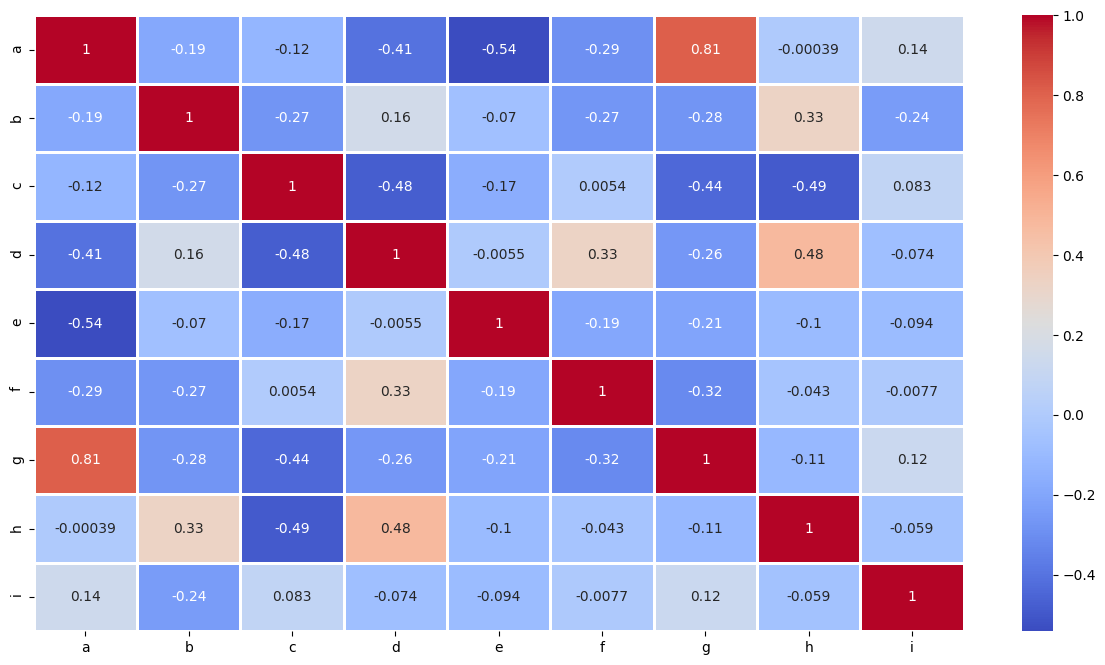

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(cor_df, annot=True, cmap='coolwarm', linewidths='1')

### Findings: 
The correlation of the ingredients can be obtained form the heatmap above
* Ingredient a and g is highly correlated, they have a correlation of 0.81, a strong positive relationship
* Most ingredients in the dataset are fairly correlated with each other

# Clustering

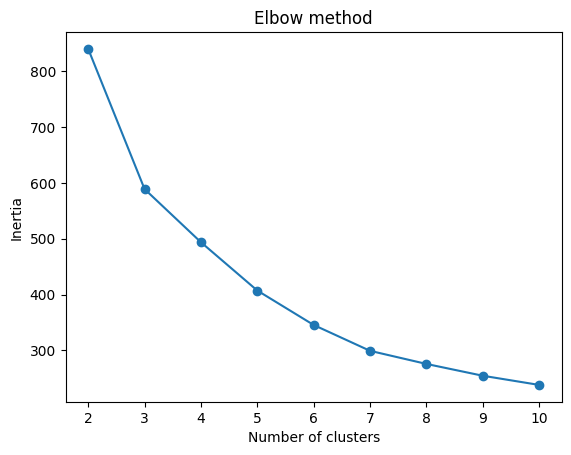

In [138]:
# K means clustering
# Using elbow method to determine how many clusters touse
from sklearn.cluster import KMeans

inertias = []

for j in range(2,11):
    kmeans = KMeans(n_clusters=j, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Findings:
3 is the number of cluster that has the most significant reduce in error

In [139]:
# K means 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df)
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2])

In [140]:
df['Kmeans'] = kmeans.labels_

In [141]:
df

,a,b,c,d,e,f,g,h,i,Kmeans
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,0
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,1
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22,1


In [142]:
df['Kmeans'].value_counts()

1    162
2     31
0     21
Name: Kmeans, dtype: int64

<AxesSubplot:>

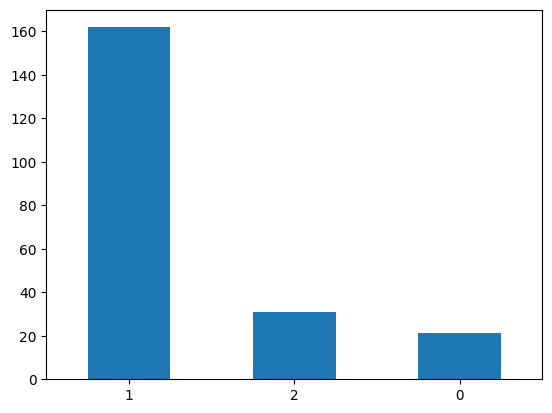

In [143]:
# Cluster distribution
df['Kmeans'].value_counts().plot.bar(rot=1)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='a', ylabel='g'>

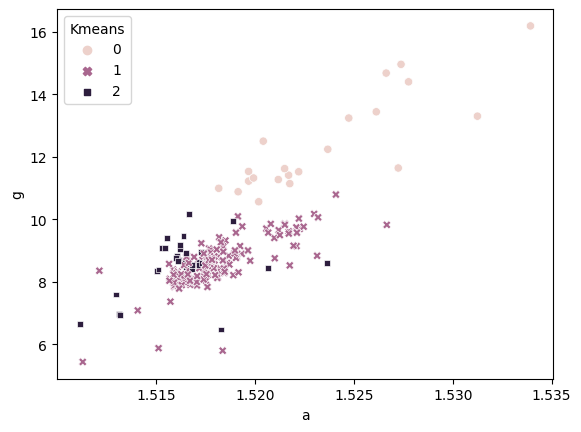

In [144]:
# Cluster visualization
sns.scatterplot(df['a'], df['g'], hue=df['Kmeans'], style=df['Kmeans'])

### Findings:
There are estimatedly 3 different formulations based on the ingredient used